# Modeling

### Import libraries

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNetCV, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

%matplotlib inline

In [208]:
df = pd.read_csv('../dataset/preprocessed_data.csv', index_col=0)
df

,score,rating,price,summer,initial_inspection,0,1,2,3,4,...,11435,11436,11692,11693,11694,2015,2016,2017,2018,2019
0,10.0,4.0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,7.0,4.0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5.0,4.0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5.0,3.5,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,6.0,3.5,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,13.0,3.5,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,21.0,4.5,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7,6.0,4.5,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8,18.0,4.5,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,7.0,4.5,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [209]:
df.columns

Index(['score', 'rating', 'price', 'summer', 'initial_inspection', '0', '1',
       '2', '3', '4',
       ...
       '11435', '11436', '11692', '11693', '11694', '2015', '2016', '2017',
       '2018', '2019'],
      dtype='object', length=197)

### Linear Regression

In [261]:
#features = ['boro', 'zipcode', 'rating', 'price', 'summer', 'initial_inspection', 'year']
#features = ['rating', 'price', 'summer', 'initial_inspection']

X = df.drop(columns=['score'])
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [262]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [263]:
lr = LinearRegression()
lasso = LassoCV()
ridge = RidgeCV()
elastic = ElasticNetCV()

In [264]:
cross_val_score(lr, X_train_sc, y_train).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


-1.6639646650013112e+27

In [265]:
lr.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [266]:
lr.score(X_train_sc, y_train)

0.04705382263954827

In [267]:
lr.score(X_test_sc, y_test)

-3.852025052128461e+23

In [268]:
cross_val_score(lasso, X_train_sc, y_train).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

0.007272646653613009

In [269]:
lasso.fit(X_train_sc, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [270]:
lasso.score(X_train_sc, y_train)

0.030632489294603164

In [271]:
lasso.score(X_test_sc, y_test)

0.016853027146746524

In [272]:
cross_val_score(ridge, X_train_sc, y_train).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


-0.021891653650390513

In [273]:
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [274]:
ridge.score(X_train_sc, y_train)

0.06628854987713584

In [275]:
ridge.score(X_test_sc, y_test)

0.0025629739111628913

In [276]:
cross_val_score(elastic, X_train_sc, y_train).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

0.008978284305931727

In [277]:
elastic.fit(X_train_sc, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
       fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [278]:
elastic.score(X_train_sc, y_train)

0.03173187345158024

In [279]:
elastic.score(X_test_sc, y_test)

0.017015292556125994

### Randomforest Regression

In [281]:
#features = ['boro', 'zipcode', 'rating', 'price', 'summer', 'initial_inspection', 'year']
#features = ['rating', 'price', 'summer', 'initial_inspection']

X = df.drop(columns=['score'])
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [282]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [283]:
rf = RandomForestRegressor()
et = ExtraTreeRegressor()
dt = DecisionTreeRegressor()
br = BaggingRegressor()

In [284]:
cross_val_score(rf, X_train_sc, y_train).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-0.27577299832066515

In [285]:
rf.fit(X_train_sc, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [286]:
rf.score(X_train_sc, y_train)

0.5704212883900658

In [287]:
rf.score(X_test_sc, y_test)

-0.22740417866824525

In [288]:
cross_val_score(et, X_train_sc, y_train).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


-0.7880005059612897

In [289]:
et.fit(X_train_sc, y_train)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
          max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

In [290]:
et.score(X_train_sc, y_train)

0.6968540402686121

In [291]:
et.score(X_test_sc, y_test)

-0.5797874453449483

In [292]:
cross_val_score(dt, X_train_sc, y_train).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


-0.7794024759804333

In [293]:
dt.fit(X_train_sc, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [294]:
dt.score(X_train_sc, y_train)

0.6968540402686121

In [295]:
dt.score(X_test_sc, y_test)

-0.5870497997626054

In [296]:
cross_val_score(br, X_train_sc, y_train).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


-0.28054380977602533

In [297]:
br.fit(X_train_sc, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [298]:
br.score(X_train_sc, y_train)

0.5805286011095445

In [299]:
br.score(X_test_sc, y_test)

-0.21597542736771858

### Neural Network

In [300]:
#features = ['boro', 'zipcode', 'rating', 'price', 'summer', 'initial_inspection', 'year']

X = df.drop(columns=['score'])
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [301]:
ss = StandardScaler()

In [302]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [303]:
model = Sequential()

# First hidden layer
model.add(Dense(20, activation='relu', input_dim=X_train.shape[1]))

# Second hidden layer
model.add(Dense(10, activation='relu'))

# For regression, the output layer is ALWAYS:
# 1 neuron
# No activation function
model.add(Dense(1, activation=None))

In [304]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [305]:
model.fit(X_train_sc, y_train,
         validation_data=(X_test_sc, y_test),
         epochs=10)

Train on 5760 samples, validate on 1920 samples
Epoch 1/10
5760/5760 [==============================] - 1s 145us/step - loss: 253.4654 - val_loss: 143.2671
Epoch 2/10
5760/5760 [==============================] - 0s 62us/step - loss: 119.9557 - val_loss: 118.3867
Epoch 3/10
5760/5760 [==============================] - 0s 61us/step - loss: 111.8309 - val_loss: 117.3738
Epoch 4/10
5760/5760 [==============================] - 0s 60us/step - loss: 110.3305 - val_loss: 117.3512
Epoch 5/10
5760/5760 [==============================] - 0s 62us/step - loss: 109.5519 - val_loss: 117.4929
Epoch 6/10
5760/5760 [==============================] - 0s 61us/step - loss: 109.2362 - val_loss: 117.6570
Epoch 7/10
5760/5760 [==============================] - 0s 63us/step - loss: 108.9818 - val_loss: 117.4042
Epoch 8/10
5760/5760 [==============================] - 0s 62us/step - loss: 108.7957 - val_loss: 117.6183
Epoch 9/10
5760/5760 [==============================] - 0s 63us/step - loss: 108.5771 - val_los

In [307]:
preds = model.predict(X_test_sc)

In [306]:
from sklearn.metrics import r2_score

In [310]:
y_test[:20]

5992    41.0
4466    10.0
1575    12.0
4787     5.0
3538    22.0
1193    12.0
4714    17.0
4086    17.0
37      16.0
1405    11.0
6643    24.0
6559    13.0
6820    42.0
6280    18.0
1758    11.0
2521    58.0
7609    10.0
6317    12.0
2115    12.0
1669    13.0
Name: score, dtype: float64

(array([1.006e+03, 4.073e+03, 1.057e+03, 7.450e+02, 3.570e+02, 1.850e+02,
        1.090e+02, 6.800e+01, 4.200e+01, 1.700e+01, 1.000e+01, 3.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.  ,   6.85,  13.7 ,  20.55,  27.4 ,  34.25,  41.1 ,  47.95,
         54.8 ,  61.65,  68.5 ,  75.35,  82.2 ,  89.05,  95.9 , 102.75,
        109.6 , 116.45, 123.3 , 130.15, 137.  ]),
 <a list of 20 Patch objects>)

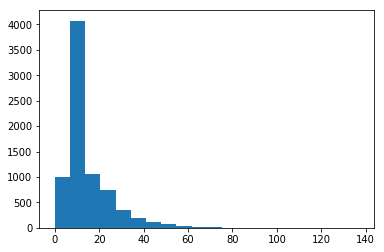

In [315]:
plt.hist(y, bins=20)

In [1]:
plt.scatter(df['price'], df['score'])
plt.xlabel('Price', size=15)
plt.ylabel('Score', size=15)

NameError: name 'plt' is not defined

In [312]:
preds[:20]

array([[15.330189 ],
       [14.361861 ],
       [10.199347 ],
       [11.204885 ],
       [20.413912 ],
       [13.940799 ],
       [21.507778 ],
       [12.058456 ],
       [15.62653  ],
       [17.076868 ],
       [13.511232 ],
       [15.5946865],
       [12.611149 ],
       [13.684148 ],
       [13.329492 ],
       [20.522324 ],
       [14.181321 ],
       [12.534037 ],
       [15.289196 ],
       [13.018463 ]], dtype=float32)

In [308]:
r2_score(y_test, preds )

0.004144809809918493